This notebook is used to create tone waveforms + tones for the DDR memory on the XCVR program

In [23]:
%matplotlib inline
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

In [51]:
def createTones(frequency_offset, num_tones=16):
    # define signal rate
    Fs = 1.28125e9
    N_samples = 131072;
    t = np.arange(N_samples)
    
    # define fundamental frequency
    fundamental_freq = Fs / (N_samples);
    
    # fundamental frequency is around 9775kHz
    # all tones must be in multiples of that
    
    freq_space_desired = 10e6;
    freq_space = int(freq_space_desired / fundamental_freq) * fundamental_freq
    print(freq_space)
    # specifying initial frequency offsets
    
    # -500MHz starting
    freq_offset = -498533248.9013670
     
    # 40MHz starting
    freq_offset = 39999961.85302730
    
    # 0MHz starting
    freq_offset = 0


    freq_offset = frequency_offset;
    
    sig_out = np.zeros(N_samples)
    for x in range(num_tones):
        freq_tone = x*freq_space + freq_offset
        sig_out = sig_out + np.round((2**7-1)*(np.cos(2*np.pi*freq_tone/Fs*t) +   1j*np.sin(2*np.pi*freq_tone/Fs*t)))

    
    print("max: " + str(np.max(sig_out)))
    file_out = open('data.txt', 'w')
    for x, item in enumerate(sig_out):
        num_real = int(item.real)
        num_imag = int(item.imag)
        if (num_real < 0):
            num_real = num_real + 2**16;
        if (num_imag < 0):
            num_imag = num_imag + 2**16;
        file_out.write(format(num_real, '04x') + format(num_imag, '04x') + '\n')
    file_out.close()
    
    
    
    print("max: " + str(np.max(sig_out)))
    file_out = open('data2.txt', 'w')
    for x, item in enumerate(sig_out):
        num_real = int(item.real)
        num_imag = int(item.imag)
        if (num_real < 0):
            num_real = num_real + 2**16;
        if (num_imag < 0):
            num_imag = num_imag + 2**16;
        file_out.write(format(0, '04x') + format(0, '04x') + '\n')
    file_out.close()
    return sig_out



9999990.463256836
max: (7620+334j)
max: (7620+334j)


C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'FFT Out')

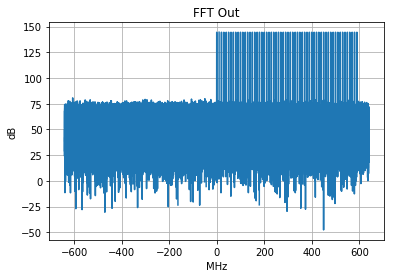

In [52]:
sig_out = createTones(0, num_tones=60)
freq_axis = np.linspace(-1281.25/2,1281.25/2,sig_out.size)
sig_fft = 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_out))))
plt.plot(freq_axis, sig_fft)
plt.grid(True)
plt.ylabel('dB')
plt.xlabel('MHz')
plt.title('FFT Out')

Text(0.5,0,'MHz')

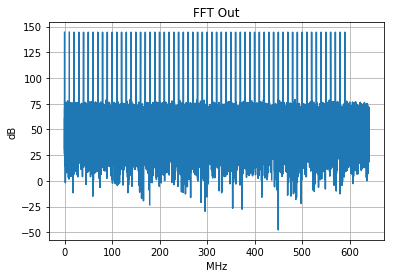

In [53]:
plt.plot(freq_axis[65536:], sig_fft[65536:])
plt.grid(True)
plt.title('FFT Out')
plt.ylabel('dB')
plt.xlabel('MHz')